# Is It Possible to Satisfy the RDA? - Companion Notebook

Welcome to the companion for the project "Is It Possible to Satisfy the RDA!"  

The script below loads the original dataset provided by the USDA called the SR28, as well as a small subset of that data, and a few functions.

In [24]:
%run -i "data.py"

## Overview of the Dataset

The original dataset contains thousands of records, while the curated dataset is smaller.

In [25]:
print('SR28:', len(dfo))
# df - curated subset
print('Curated subset:', len(df))

SR28: 6347
Curated subset: 136


The curated data has been calibrated to 50 gram serving sizes.  Here are the first few rows.

In [26]:
df.head(5)

,Food Group,Food,Protein (g),Fat (g),Carbohydrates (g),Ash (g),Calories,Starch (g),Sucrose (g),Glucose (g),...,Niacin (B3) (mg),Vitamin B5 (mg),Vitamin B6 (mg),Folate (B9) (mcg),Vitamin B12 (mcg),Choline (mg),Cholesterol (mg),Saturated Fat (g),Net Carbs,Mass (g)
ID#,,,,,,,,,,,,,,,,,,,,,
1009,Dairy and Egg Products,"Cheese, cheddar",11.435,16.655,1.545,1.855,202.0,0.0,0.000,0.13,...,0.0295,0.2050,0.0330,13.5,0.550,8.25,49.5,9.4335,1.545,50.0
1015,Dairy and Egg Products,"Cheese, cottage",5.225,1.135,2.380,0.635,40.5,0.0,0.000,0.00,...,0.0515,0.2620,0.0285,4.0,0.235,8.15,6.0,0.6175,2.380,50.0
1026,Dairy and Egg Products,"Cheese, mozzarella",11.085,11.175,1.095,1.640,150.0,0.0,0.015,0.28,...,0.0520,0.0705,0.0185,3.5,1.140,7.70,39.5,6.5760,1.095,50.0
1077,Dairy and Egg Products,"Milk, whole",1.575,1.625,2.400,0.335,30.5,0.0,0.000,0.00,...,0.0445,0.1865,0.0180,2.5,0.225,7.15,5.0,0.9325,2.400,50.0
1116,Dairy and Egg Products,"Yogurt, plain",1.735,1.625,2.330,0.360,30.5,0.0,0.000,0.00,...,0.0375,0.1945,0.0160,3.5,0.185,7.60,6.5,1.0480,2.330,50.0


The goal of the project is analyzing how much nutrient satisfaction is possible on the basis of natural foods.  Since we eat more genuses of plants than animals, fruits and vegetables have more entries.

In [27]:
df['Food Group'].value_counts().to_frame()

,Food Group
Vegetables and Vegetable Produ,37
Fruits and Fruit Juices,26
Finfish and Shellfish Products,10
Legumes and Legume Products,10
"Lamb, Veal",8
Nut and Seed Products,8
Dairy and Egg Products,8
Cereal Grains and Pasta,6
Poultry Products,5
Beef Products,4


View the foods included in any group.

In [28]:
group = 'Beef Products'
s = df.loc[df['Food Group'] == group].Food
s.to_frame()

,Food
ID#,
13367,"Beef, brisket"
13373,"Beef, chuck"
13399,"Beef, round"
13451,"Beef, top sirloin"


The `food_finder()` function allows you to search for foods.  It prints all records that match to let you choose something specific if necessary.  

`key_nutrients` is a short list of nutrients to try to get a snapshot of a food's contents.  

In [29]:
key_nutrients = ['Protein (g)', 
                 'Fiber (g)',
                 'Vitamin A (IU)',
                 'Thiamin (B1) (mg)',
                 'Vitamin C (mg)',
                 'Calcium (mg)', 
                 'Iron (mg)']

In [30]:
food = food_finder('brisket')
df.loc[food, key_nutrients]

ID#
13367    Beef, brisket
Name: Food, dtype: object


Protein (g)          13.395
Fiber (g)                 0
Vitamin A (IU)            0
Thiamin (B1) (mg)     0.035
Vitamin C (mg)            0
Calcium (mg)            3.5
Iron (mg)             1.265
Name: 13367, dtype: object

In [31]:
food = food_finder('apple')
# In the case of apples, two foods are referenced.  The user needs to specify the right one.
food = 9003
df.loc[food, key_nutrients]

ID#
9003          Apples, raw
9267    Pineapple, canned
Name: Food, dtype: object


Protein (g)            0.13
Fiber (g)               1.2
Vitamin A (IU)           27
Thiamin (B1) (mg)    0.0085
Vitamin C (mg)          2.3
Calcium (mg)              3
Iron (mg)              0.06
Name: 9003, dtype: object

## Nutrient Profiles

Let us look at the nutrients in various foods.  Run the code below.

In [32]:
%run -i "explore_functions.py"

This project focuses on nutrient density or nutrients per calories.  The `analyze_food()` function shows a nutrient profile for a food per 50 calories.

Use the code below to explore different foods, replacing the initial text assignment for `food`.

ID#
11457    Spinach, raw
Name: Food, dtype: object


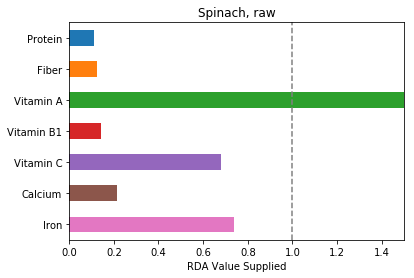

In [33]:
name = 'spinach'
food = food_finder(name)
# food = 1009
s = analyze_food_kn(food)

See the complete nutients for the given food here.  The nutrients are grouped implicitly as macros, minerals, and vitamins.

In [34]:
print(names[food], '\n')
print(s)

Spinach, raw 

Stripped Name
Protein          0.11
Carbohydrates    0.06
Fiber            0.13
Calcium          0.22
Copper           0.31
Fluoride         0.00
Iron             0.74
Magnesium        0.43
Manganese        0.85
Phosphorus       0.15
Potassium        0.26
Selenium         0.04
Sodium           0.11
Zinc             0.10
Vitamin A        6.79
Vitamin B1       0.14
Vitamin B2       0.32
Vitamin B3       0.10
Vitamin B5       0.03
Vitamin B6       0.33
Vitamin B9       1.05
Vitamin B12      0.00
Vitamin C        0.68
Vitamin D        0.00
Vitamin E        0.29
Choline          0.08
Name: Nutrient (unit), dtype: float64


## Nutrient Best Sources

The following code will create a dataframe of the best sources for each nutrient (per 50 calories).

In [35]:
nutrients = rda.index
best_sources = pd.DataFrame(columns = ['Food', 'Prop. RDA'])

for nutr in nutrients:
    # Takes the top food for a given nutrient.
    a = dv[nutr].sort_values(ascending = False).head(1)
    best_sources.loc[nutr] = [names[a.index[0]], a.iloc[0].round(2)]
    
best_sources 

,Food,Prop. RDA
Protein (g),"Fish, haddock",0.20
Carbohydrates (g),"Limes, raw",0.14
Fiber (g),"Raspberries, raw",0.16
Calcium (mg),"Spinach, raw",0.22
Copper (mg),"Mushrooms, morel",1.12
Fluoride (mcg),"Asparagus, cooked",0.01
Iron (mg),"Mushrooms, morel",2.46
Magnesium (mg),"Spinach, raw",0.43
Manganese (mg),"Spinach, raw",0.85
Phosphorus (mg),"Mushrooms, morel",0.45


This function allows you to explore an individual nutrient's top sources.  

In [36]:
def show_top_sources(nutrient):
    '''
    Shows the top 10 sources for a nutrient, per 50 calories.
    '''
    try:
        s = dv[['Food', nutrient]]
    except KeyError:
        print('Check the spelling of your nutrient.')
        print(list(nutrients))
        return None
    s.set_index('Food', inplace = True)
    s[nutrient].sort_values().tail(10).plot.barh()
    plt.xlabel('Proportion RDA')    
    plt.ylabel('')
    plt.title('Top Sources for ' + nutrient)

Enter the name of any nutrient you want to explore.  (Check the exact spelling of any nutrient you want to try - the units are part of the name.)

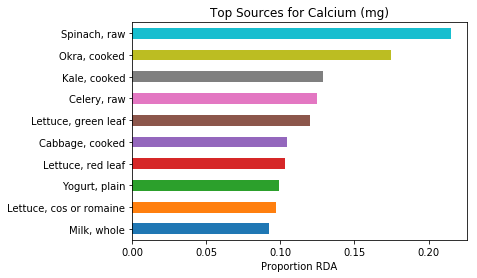

In [37]:
nutrient = 'Calcium (mg)'
show_top_sources(nutrient)

## Guided Diet Simulation

The following code imports the `RandomGut` class.  This class simulates a subject choosing foods at random within the MyPlate dietary guidelines.  

In [38]:
%run -i "Gut.py"
%run -i "RandomGut.py"

`food_group_calories` represents how much of each food group the subject is recommended to eat.  The following values are meant to represent those for a moderately active 28-year-old male.  The default RDA values are for the same subject.

Feel free to modify them for a different demographic or dietary plan.  

In [39]:
food_group_calories = {'Fruits': 300,
     'Vegetables': 150,
     'Grains': 1100,
     'Protein': 400,
     'Dairy': 450,
     'Snacks': 200}

The code below simulates a diet following the calorie goals above.  The result will be a long list foods eaten in small, 50-calorie servings, tracked against the total calories consumed at that point.  This is a random process, and the results will differ each time.  

The output will be the status of a select set of nutrients over the course of the day's diet, as well as the total number of nutrients satisfied (100% or more) at each calorie point.

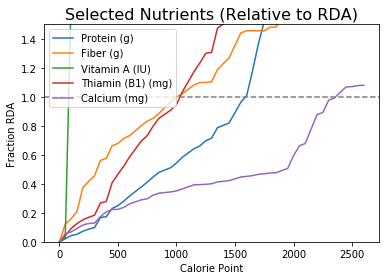

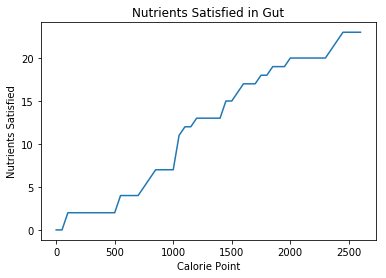

In [40]:
# Optional line for random seed.
# nr.seed(0)
v = food_group_calories.values()
calories = np.array(list(v)).sum()

r = RandomGut(df = dfa, calorie_limit = calories, food_group_calories = food_group_calories)
r.plot_nutrients()
r.plot_satisfaction()

The cell below enables you to look at the foods eaten from a specific food group.

In [45]:
tracker = r.get_tracker()

print('Food Groups')
print(tracker['Food Group'].unique(), '\n')

food_group = 'Fruits'
print(food_group)
print(tracker.Food.loc[tracker['Food Group'] == food_group])

Food Groups
['Fruits' 'Vegetables' 'Grains' 'Protein' 'Dairy' 'Snacks'] 

Fruits
50             Limes, raw
100    Melons, cantaloupe
150             Figs, raw
200      Raspberries, raw
250       Cherries, sweet
300          Bananas, raw
Name: Food, dtype: object


This cell shows the entire day's diet.

In [46]:
tracker.Food

50                          Limes, raw
100                 Melons, cantaloupe
150                          Figs, raw
200                   Raspberries, raw
250                    Cherries, sweet
300                       Bananas, raw
350                   Cauliflower, raw
400                  Pickles, cucumber
450                        Peas, green
500                        Rice, brown
550                Bread, pumpernickel
600                       Bread, wheat
650                Bread, pumpernickel
700                Bread, pumpernickel
750                     Quinoa, cooked
800                       Bread, wheat
850                Bread, pumpernickel
900                    Barley, pearled
950                    Barley, pearled
1000                    Quinoa, cooked
1050                   Bread, oat bran
1100                        Bread, rye
1150                        Bread, rye
1200                       Rice, brown
1250         Pasta, fresh-refrigerated
1300                     

The code below sums up the nutritional performance of the diet above in terms of the RDA for the same subject.  **Median** denotes the median RDA satisfaction in terms of proportions, so 1.0 corresponds to 100%.  **Unsatisfied** denotes the number of nutrients where the RDA was not met by the diet, out of a total of 26 tracked nutrients.

In [43]:
r.get_results()

Median         2.01
Unsatisfied    3.00
dtype: float64

In a simulation of the `RandomGut` with 1000 iterations, the average median satisfaction was 1.93 (almost 2x the RDA), and the average number of unsatisfied nutrients was 4.4.  This result shows fairly good performance of the MyPlate dietary recommendations.